# EDA del dataset spam_ham_dataset.csv sobre spam en inglés.
Se puede encontrar en 
https://www.kaggle.com/datasets/venky73/spam-mails-dataset?resource=download

### Introducción al Dataset de Spam

El dataset de correos spam disponible en Kaggle contiene dos columnas principales:
1. `text`: El cuerpo del correo electrónico, es decir, el contenido del mensaje.
2. `label`: La etiqueta que indica si el correo es spam  o ham.

La finalidad principal de este dataset es permitir la construcción de modelos de clasificación que puedan distinguir entre correos legítimos y spam. Un análisis exploratorio de datos bien ejecutado en este contexto puede revelar información valiosa, como las palabras más comunes en correos spam y no spam, la longitud típica de los mensajes, y otras características que pueden influir en la clasificación.

### Pasos en el EDA del Dataset de Spam

#### 1. **Carga y revisión inicial de los datos**
   - **Carga del dataset**: Importar los datos en un entorno de trabajo.
   - **Visión general**: Obtener las primeras filas del dataset y verificar su estructura.
   - **Resumen estadístico**: Describir el dataset con estadísticas básicas (conteos, medias, desviaciones estándar).

#### 2. **Análisis de la etiqueta `label`**
   - **Distribución de clases**: Verificar la proporción de correos spam y no spam.
   - **Balance de datos**: Determinar si las clases están balanceadas o si es necesario aplicar técnicas de balanceo.

#### 3. **Análisis del contenido del `text`**
   
   - **Análisis de frecuencia**: Identificar las palabras más comunes en cada clase (`spam` y `no spam`).
   - **Longitud de los correos**: Analizar la longitud de los correos en cada clase.

#### 4. **Visualización de los datos**
   - **Histogramas y gráficos de barras**: Visualizar la distribución de la longitud de los correos y las palabras más comunes.
   - **Nubes de palabras**: Crear nubes de palabras para representar gráficamente las palabras más frecuentes en correos spam y no spam.





In [1]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Cargar el dataset
df = pd.read_csv('../data_en/spam_ham_dataset.csv')

# Visualizar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())

Primeras filas del dataset:
   Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0  


In [2]:
# Resumen estadístico del dataset
print("\nResumen estadístico:")
print(df.describe())

# Verificar datos faltantes
print("\nDatos faltantes en cada columna:")
print(df.isnull().sum())


Resumen estadístico:
        Unnamed: 0    label_num
count  5171.000000  5171.000000
mean   2585.000000     0.289886
std    1492.883452     0.453753
min       0.000000     0.000000
25%    1292.500000     0.000000
50%    2585.000000     0.000000
75%    3877.500000     1.000000
max    5170.000000     1.000000

Datos faltantes en cada columna:
Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64


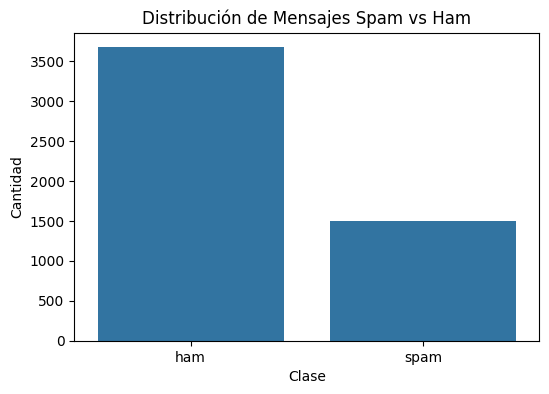

In [3]:
# Distribución de las clases
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='label')
plt.title('Distribución de Mensajes Spam vs Ham')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.show()

In [6]:
# Distribución de las clases en números
print("\nDistribución de Mensajes Spam vs Ham:")
print(df['label'].value_counts())



Distribución de Mensajes Spam vs Ham:
label
ham     3672
spam    1499
Name: count, dtype: int64


Vemos un desbalanceo que habrá que considerar.

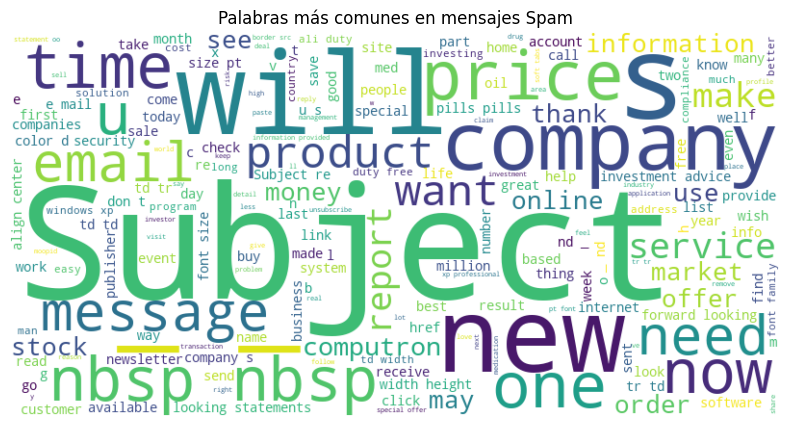

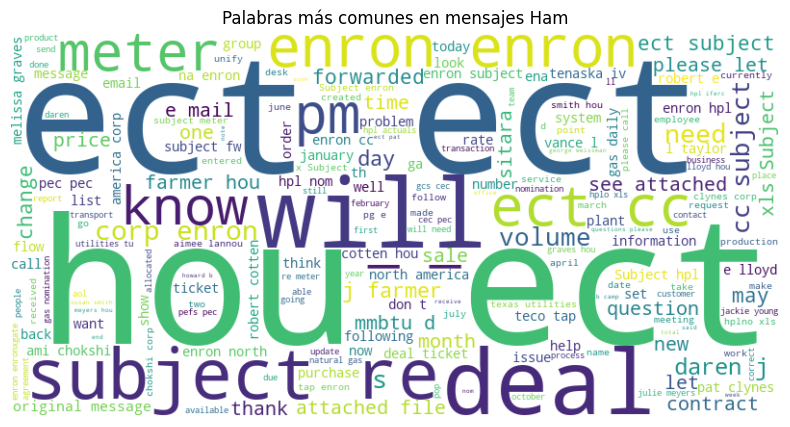

In [4]:
# Palabras más comunes en mensajes "spam" y "ham"
def generate_wordcloud(data, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data))
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

spam_words = df[df['label'] == 'spam']['text']
ham_words = df[df['label'] == 'ham']['text']

generate_wordcloud(spam_words, 'Palabras más comunes en mensajes Spam')
generate_wordcloud(ham_words, 'Palabras más comunes en mensajes Ham')

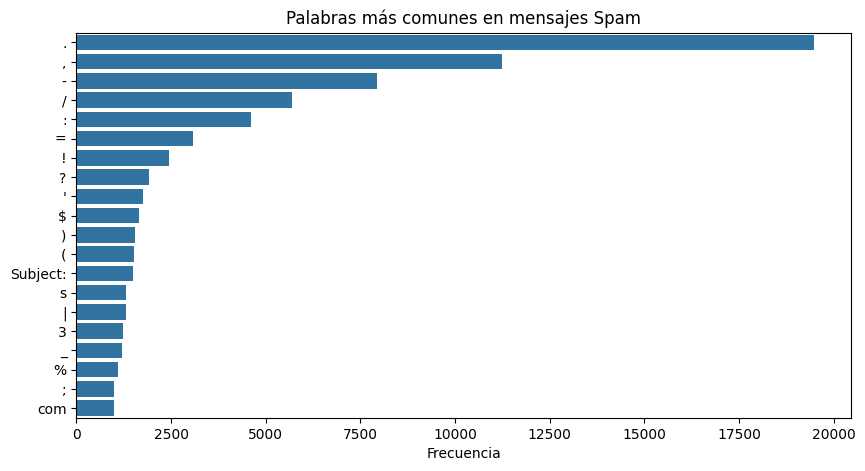

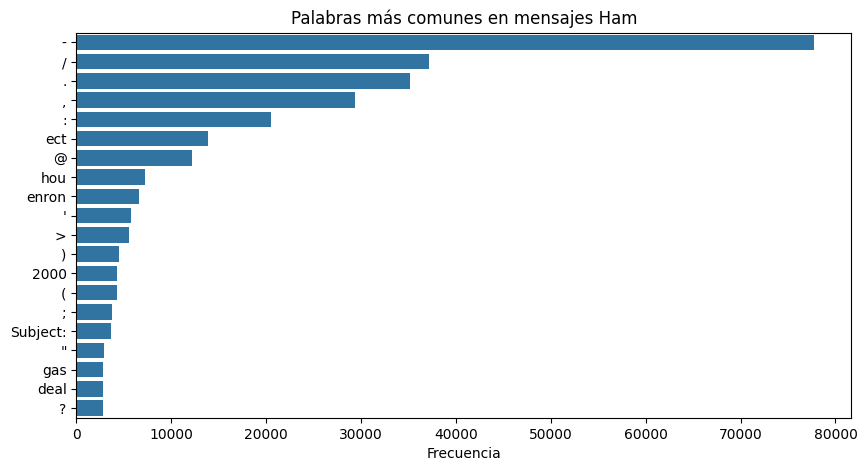

In [5]:
# Análisis de palabras más frecuentes
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def plot_common_words(text, title):
    words = ' '.join(text).split()
    words = [word for word in words if word.lower() not in ENGLISH_STOP_WORDS]
    word_freq = Counter(words)
    common_words = word_freq.most_common(20)
    
    words, counts = zip(*common_words)
    plt.figure(figsize=(10,5))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(title)
    plt.xlabel('Frecuencia')
    plt.show()

plot_common_words(spam_words, 'Palabras más comunes en mensajes Spam')
plot_common_words(ham_words, 'Palabras más comunes en mensajes Ham')



Vemos que habrá que limpiar mucho que no aporta nada.

Pasamos a comprobar duplicados.

In [7]:
# Verificar y eliminar duplicados
print("\nNúmero de filas antes de eliminar duplicados:", df.shape[0])
df.drop_duplicates(subset='text', keep='first', inplace=True)
print("Número de filas después de eliminar duplicados:", df.shape[0])


Número de filas antes de eliminar duplicados: 5171
Número de filas después de eliminar duplicados: 4993


In [9]:
# Resumen estadístico del dataset
print("\nResumen estadístico:")
print(df.describe())

# Verificar datos faltantes
print("\nDatos faltantes en cada columna:")
print(df.isnull().sum())

# Distribución de las clases en números
print("\nDistribución de Mensajes Spam vs Ham después de eliminar duplicados:")
print(df['label'].value_counts())


Resumen estadístico:
        Unnamed: 0    label_num
count  4993.000000  4993.000000
mean   2581.528139     0.292810
std    1505.740921     0.455098
min       0.000000     0.000000
25%    1251.000000     0.000000
50%    2578.000000     0.000000
75%    3886.000000     1.000000
max    5170.000000     1.000000

Datos faltantes en cada columna:
Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

Distribución de Mensajes Spam vs Ham después de eliminar duplicados:
label
ham     3531
spam    1462
Name: count, dtype: int64


Como era previsible el desbalanceo continua.